# Data Scientist Professional Case Study

### Company Background

Nearly New Nautical is a website that allows users to advertise their used boats for sale. When users list their boat, they have to provide a range of information about their boat. Boats that get lots of views bring more traffic to the website, and more potential customers. 

To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views.




### Customer Question

The product manager wants to know the following:
- Can you predict the number of views a listing will receive based on the boat's features?



### Success Criteria

The product manager would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.


### Dataset

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

# Preparation
## Load Libraries

In [168]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,r2_score

sns.set_style('whitegrid')



## 1.2 Load Dataset

In [169]:
df=pd.read_csv('data/boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


## 2.1 Checking Dataset Information

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


From information above we know that the data has 9888 records and 10 variables with data type as follows:

**Numerical**
- **Discrete**
	1. Price (not currencies)
    2. Year Built
    3. Number of views last 7 days (Target Variable)
- **Continous**
	1. Length
    2. Width
**Categorical**
- **Nominal**
	1. Boat Type
    2. Manufacturer
    3. Type
    7. Material 
    8. Price (Currencies)
    9. Location (level 1)
- **Ordinal**
	Nothing
**Other**
- **Text**
	1. Location (> level 1)
    
Notice that some variables need to expand they are Price and Location.

In [171]:
df[['Currency','Price']]=df.Price.str.split(' ',1,expand=True)

In [172]:
df.Location.str.split('Â»',1,expand=True)

,0,1
0,Switzerland,Lake Geneva Â» VÃ©senaz
1,Germany,BÃ¶nningstedt
2,Switzerland,Lake of Zurich Â» StÃ¤fa ZH
3,Denmark,Svendborg
4,Germany,Bayern Â» MÃ¼nchen
...,...,...
9883,Switzerland,Lago Maggiore Â» Riazzino
9884,Germany,Hamburg Â» HAMBURG
9885,Germany,Nordrhein-Westfalen Â» Wesel
9886,Italy,Dormelletto


Location can generate 2 variables so let's assign them into Data Frame

In [173]:
df['Location']=df.Location.str.split('Â»',1,expand=True)[0]

In [174]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR


In [175]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
dtype: object

Price is not in proper data type. We need to convert all variables to their proper data type

In [176]:
num_vars=['Price','Year Built','Length','Width']
df[num_vars]=df[num_vars].astype('float')

In [177]:
df.dtypes

Price                          float64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                     float64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
dtype: object

Now we have new 5 variables with data type as follows:

**Numerical**
- **Discrete**
	1. Price
    
**Categorical**
- **Nominal**
	1. Location
	2. Currency

# Data Validation 

In this part we will check:
1. Duplicate data
2. The missing values

In [178]:
print(f'The data has {df.duplicated().sum()}')

The data has 0


Looks like the data has no duplicated values. good enough

In [179]:
(df.isnull().mean()*100).to_frame('average').style.background_gradient('summer_r')

,average
Price,0.000000
Boat Type,0.000000
Manufacturer,13.531553
Type,0.060680
Year Built,0.000000
Length,0.091019
Width,0.566343
Material,17.688107
Location,0.364078
Number of views last 7 days,0.000000


Looks like the dataset has following missing values:
1. Manufacturer 13.5%
2. Type 0.06%
3. Length 0.09%
4. Width 0.56%
5. Material 17.7%
6. Location 0.36%
We will drop variables with missing values more than 20%. In this case, no variable reach 20% so we will do imputation

# Exploratory Data Analysis

In [180]:
round(df.describe(),1)

,Price,Year Built,Length,Width,Number of views last 7 days
count,9888.0,9888.0,9879.0,9832.0,9888.0
mean,320137.3,1893.2,11.6,3.5,149.2
std,1007482.2,460.2,6.0,1.2,151.8
min,3300.0,0.0,1.0,0.0,13.0
25%,44000.0,1996.0,7.5,2.5,70.0
50%,95000.0,2007.0,10.3,3.3,108.0
75%,255000.0,2017.0,13.9,4.2,172.0
max,31000000.0,2021.0,100.0,25.2,3263.0


We've got some information of `Price`, `Year Built`, `Length`, `Number of views last 7 days` with their *Average (Mean)*, *Standard Deviation (Std)*, *Min value (Min)*, *Median (50%)*, *Max Value(Max)* from above but they still hard to understand so we will visualize them. There is some thing interesting with `Year Built` how can it be `0` value in a year? It doesn't make sense we will analyze further.

In [181]:
## Target
target='Number of views last 7 days'

In [182]:
size=(11,4)
def num_dist(data,var):
    fig,ax=plt.subplots(1,2,figsize=size)
    #Histogram Distribution
    sns.histplot(x=var,data=data,kde=True,ax=ax[0])
    ax[0].set_title(f'{var} Histogram Distribution')
    ax[0].axvline(x=data[var].mean(),label='Mean',color='red')
    ax[0].axvline(x=data[var].median(),label='Median',color='blue')
    ax[0].legend()

    # Boxplot distribution
    sns.boxplot(x=var,data=data,ax=ax[1])
    ax[1].set_title(f'{var} Boxplot Distribution')
    plt.show()

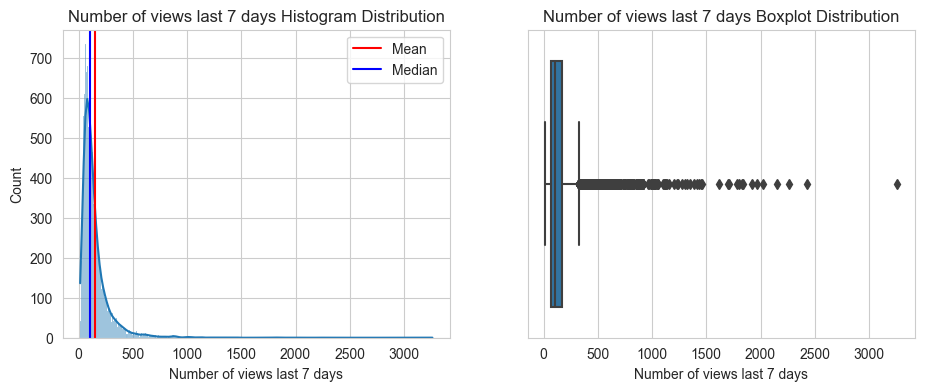

In [183]:
num_dist(df,target)

The graphic shows that the distribution tend to skew to right and it has extreme outliers.

Let's see the other Numerical variables distribution

In [184]:
num_vars=['Price','Year Built', 'Length','Width']

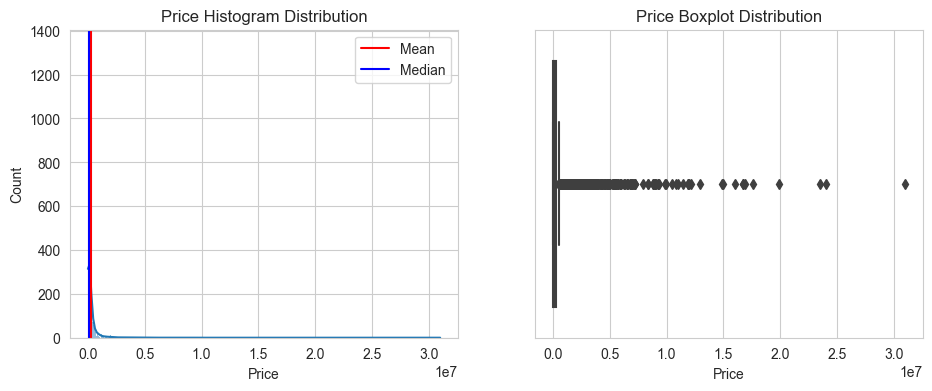

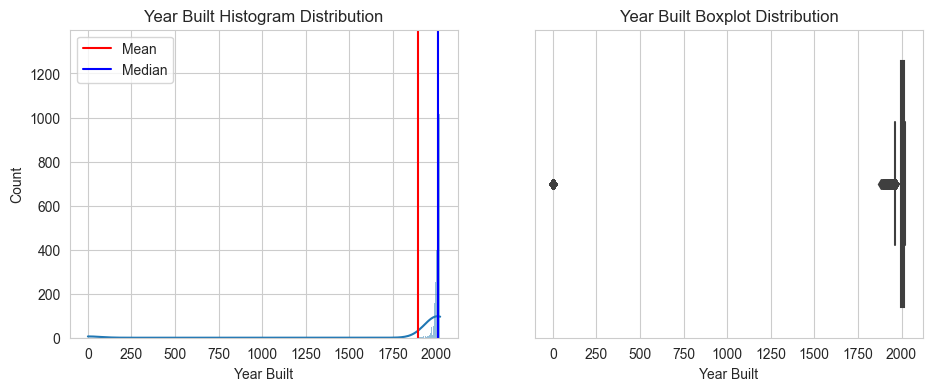

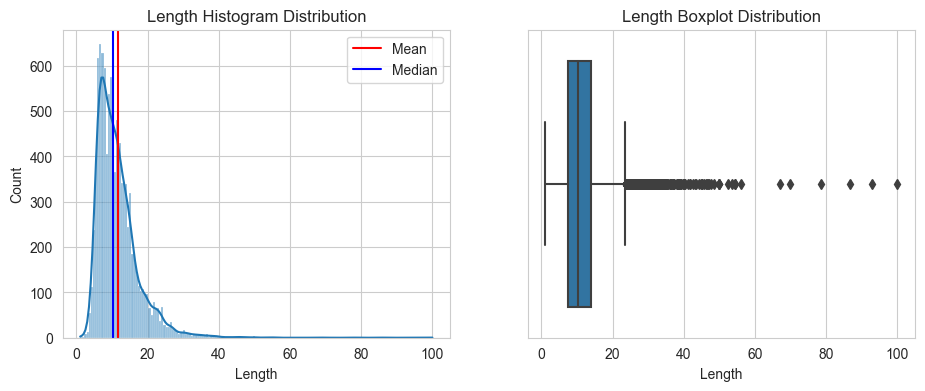

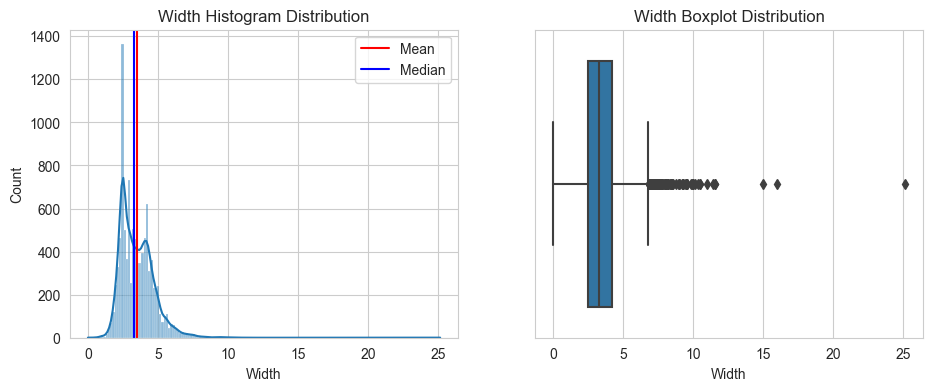

In [185]:
for var in num_vars:
    num_dist(df,var)

From graphic above we can see that:
1. `Price` has skewed to right and extreme outliers also large number in certain bin
2. `Year Built` has skewed to left and extreme outliers also large number in certain bin
3. `Length` has skewed to right and outliers
4. `right` has skewed to right and outliers

Now let see what can we find in categorical variables. In dealing with categorical variables, We should check their number of unique values avoiding mess visualization in results  we can't draw any insight bacause of it.

In [186]:
df.dtypes

Price                          float64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                     float64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
Currency                        object
dtype: object

In [187]:
cat_vars=['Boat Type', 'Manufacturer','Type','Material','Location','Currency']

In [188]:
df[cat_vars].nunique()

Boat Type       126
Manufacturer    910
Type             24
Material         11
Location        142
Currency          4
dtype: int64

Looks like we have large of unique values it means we can't visualize them all except `Currency`. We will visualize top of 5 and bottom of 5.

In [189]:
def cat_dist(data,var):
    fig,ax = plt.subplots(2,1,figsize=size)
    df=data[var].dropna().value_counts().head()
    sns.barplot(x=df.values,y=df.index,ax=ax[0])
    ax[0].set_title(f'Top 5 {var}')

    df=data[var].dropna().value_counts().sort_values().head()
    sns.barplot(x=df.values,y=df.index,ax=ax[1])
    ax[1].set_title(f'Bottom 5 {var}')

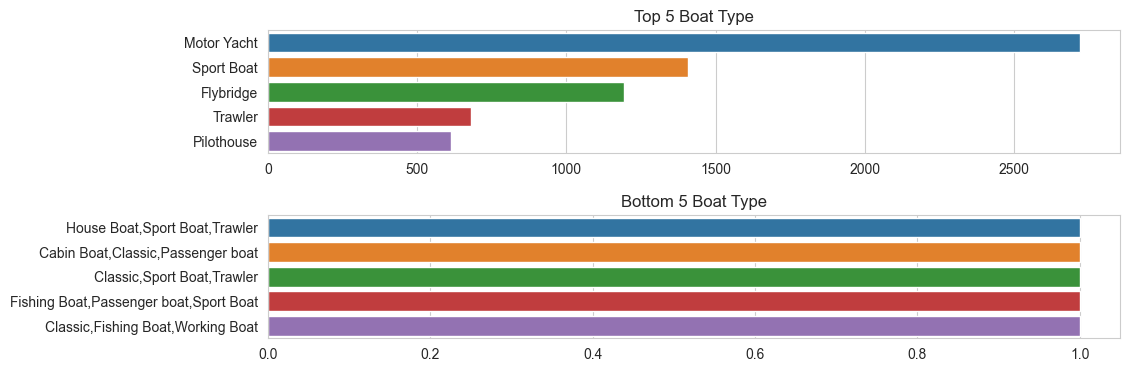

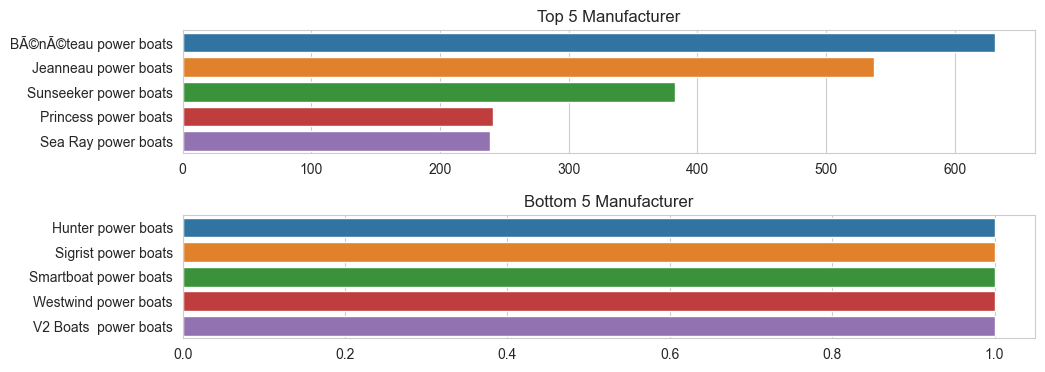

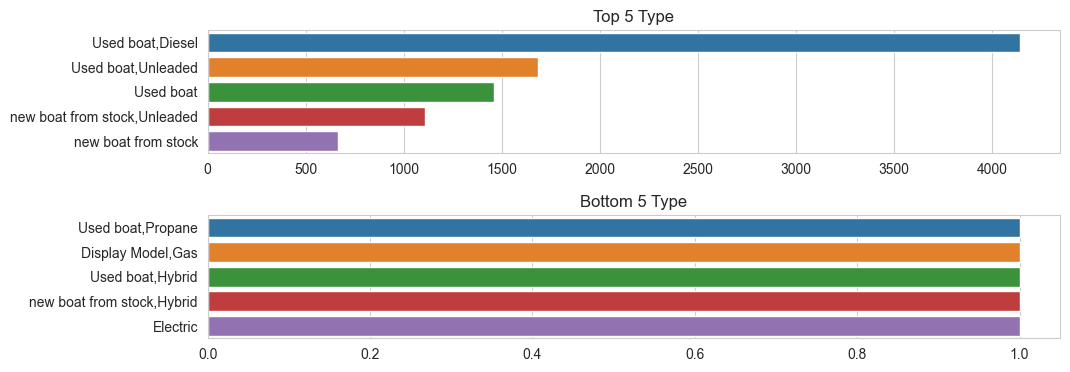

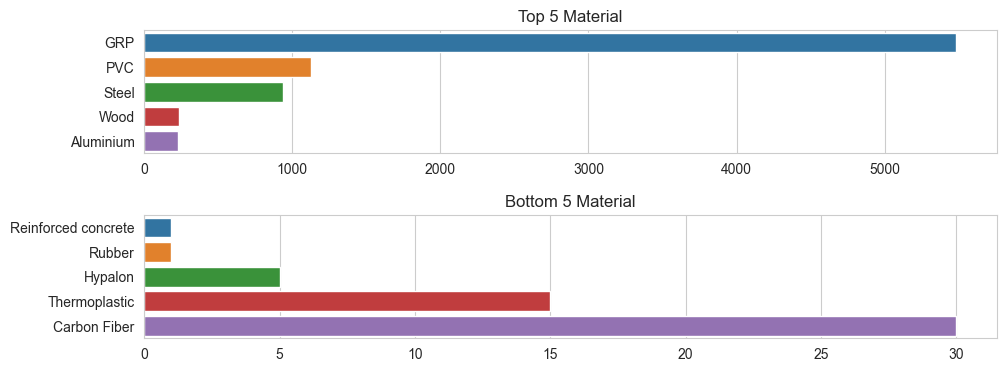

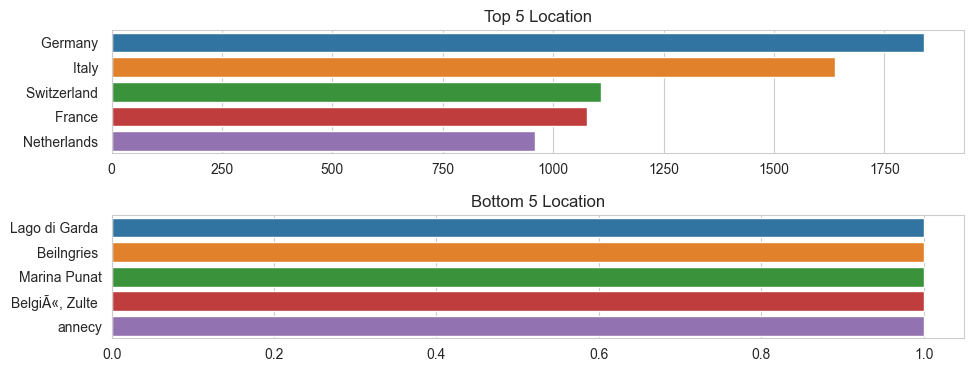

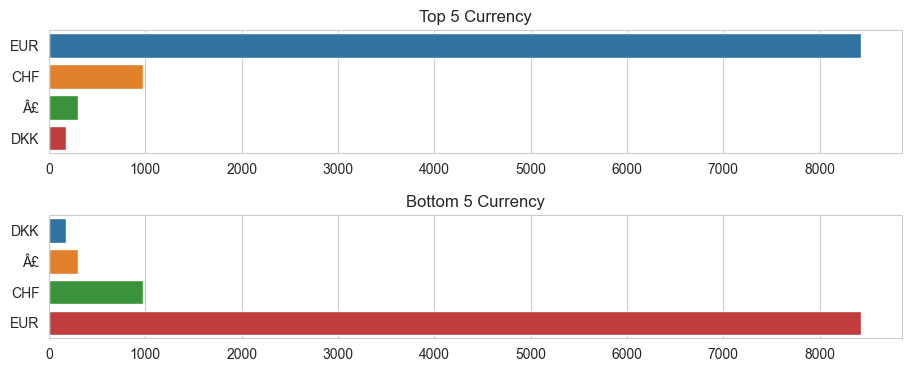

In [190]:
for var in cat_vars:
    cat_dist(df,var)

    plt.subplots_adjust(hspace=.5)

From visualization above, we see that:
1. In `Boat Type` we see `Motor Yact` appears most often and a lot of values only appear 1 so it's hard to determine whether is lowest frequency.
2. In `Manufacturer` we see `BÃ©nÃ©teau power boats ` appears most often and a lot of values only appear 1 so it's hard determine whether is lowest one.
3. In `Type` we see `Used boat,Diese` appears most often and a lot of values only appear 1 so it's hard to determine whether is lowest frequency.
4. In `Material` we see `GRP` appears most often and `Reinforced Concrete` appears fewest number.
5. In `Location` we see `germany` appears most often and a lot of values only appear 1 so it's hard to determine whether is lowest frequency.
7. In `Currency` we see `EUR` appears most often and `DKK` most lowest frequency.

Next step we want to know the relationship between target variable and predictor variables 

<AxesSubplot:>

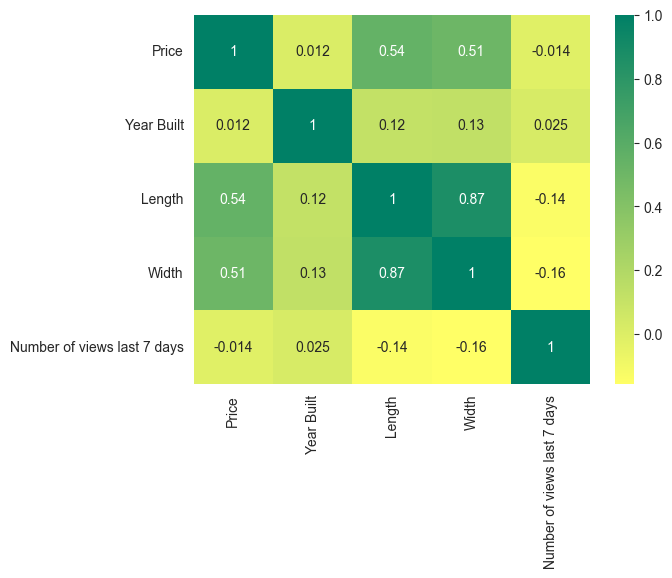

In [191]:
sns.heatmap(df.corr(),annot=True,cmap='summer_r')

Looks like Target vs Predictor has lower correlation. but we found that `Length` Vs `Width` have strong Positive Correlation and it need to do a treatment in furthur.

In [192]:
correlation=df.corr()[target].to_frame().drop(target)
correlation.style.background_gradient('summer_r')

,Number of views last 7 days
Price,-0.013856
Year Built,0.024808
Length,-0.135011
Width,-0.157547


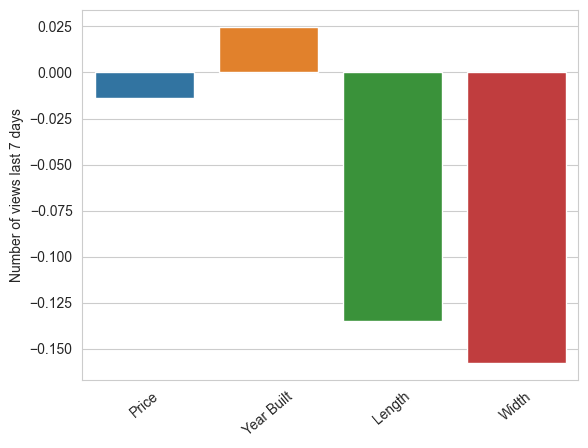

In [193]:
sns.barplot(x=correlation.index,y=target,data=correlation)
plt.xticks(rotation=40)
plt.show()

from graphic above we see that:
1. `Target` Vs `Price` have negative correlation with no significant value.
2. `Target` Vs `Year Built` have positive correlation with no significant value.
3. `Target` Vs `Length` negative correlation with no significant value.
4. `Target` Vs `Width` have negative correlation with no significant value.

Since website should prevent least views of listing boats. We should analyze which one affects the small number of views in our categorical variables. But since our categorical variables have lot of unique values we only visualize the top 5 and bottom 5 Predictor Vs Target from categorical variables.

In [194]:
def cat_vs_target(df,var):
    fig,ax=plt.subplots(2,1,figsize=size)
    data=df.groupby(var)[target].sum().sort_values(ascending=False).head()
    sns.barplot(x=data.values,y=data.index,ax=ax[0])
    ax[0].set_title(f'Top 5 {var} Vs {target}')
    data=df.groupby(var)[target].sum().sort_values().head()
    sns.barplot(x=data.values,y=data.index,ax=ax[1])
    ax[1].set_title(f'Bottom 5 {var} Vs {target}')
    plt.subplots_adjust(hspace=.5)




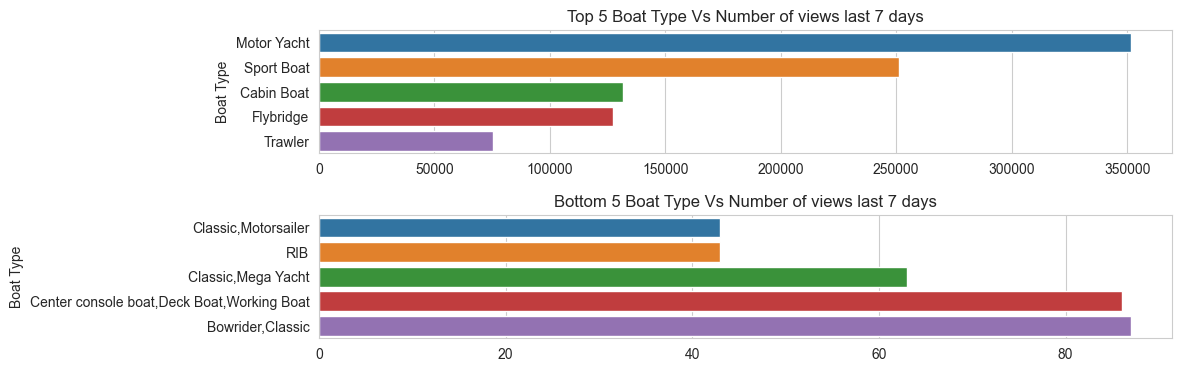

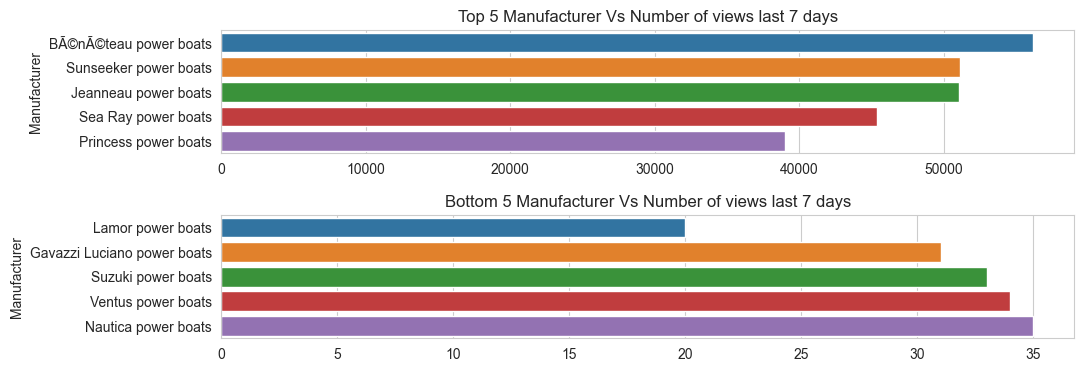

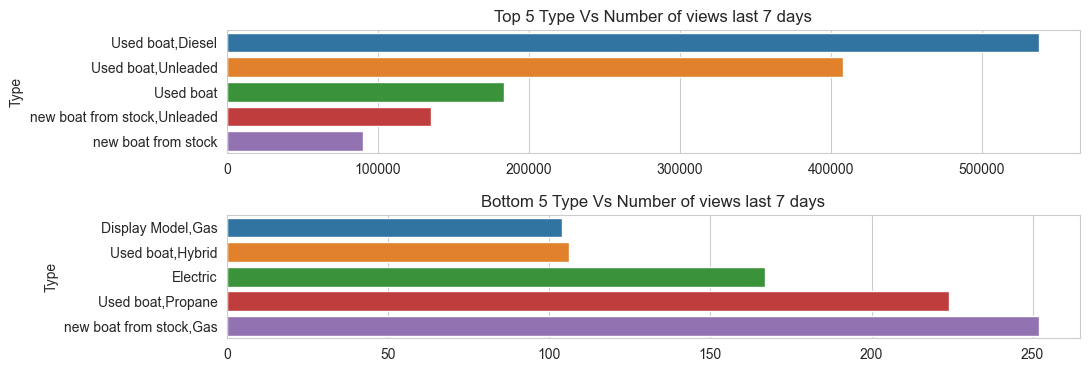

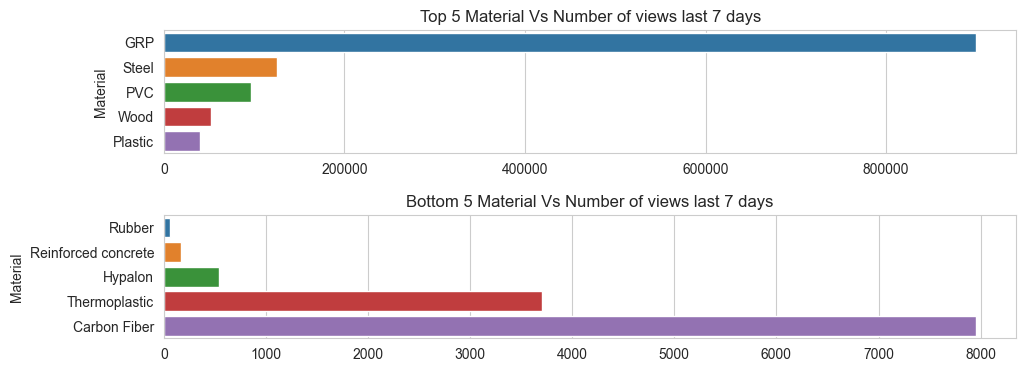

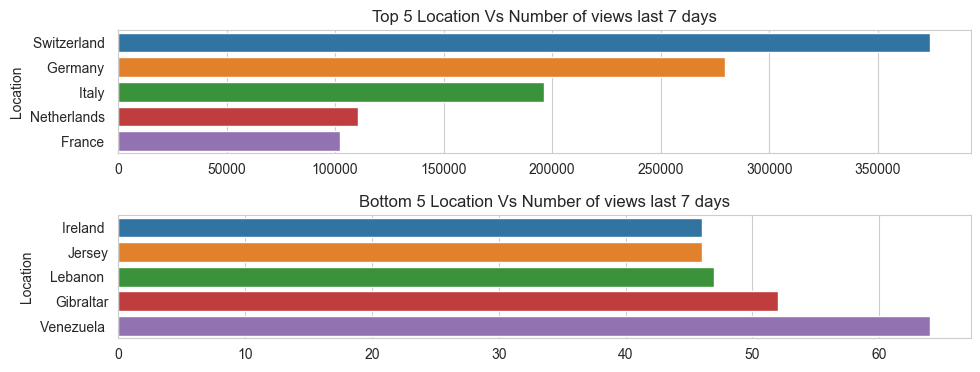

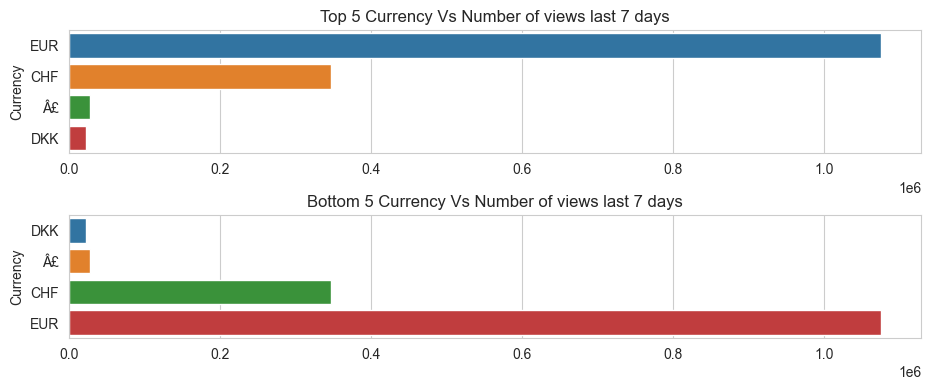

In [195]:
for var in cat_vars:cat_vs_target(df,var)

From the information above, Product Manager can restrict his business based on
- Focusing on top 5 following in each variables
  1. `Boat Type` - Motor Yacht,Sport Boat, Cabin Boat, Flybridge, Trawler
  2. `Manufacturer` - BÃ©nÃ©teau power boats, Sunseeker power boats, Jeanneau power boats, Sea Ray power boats, Princess power boats
  3. `Type` - Used boat,Diesel - Used boat,Unleaded - Used boat - new boat from stock,Unleaded - new boat from stock 
  4. `Material` - GRP, Steel, PVC, Wood, Plastic
  5. `Location` - Switzerland, Germany, Italy, Netherlands, France
  8. `Currency` - CHF, EUR

- Avoiding these 5 following in each variables
  1. `Boat Type` - Classic,Motorsailer - RIB - Classic,Mega Yacht - Center console boat,Deck Boat,Working Boat - Bowrider,Classic 
  2. `Manufacturer` - Lamor power boats, Gavazzi Luciano power boats, Suzuki power boats, Ventus power boats, Nautica power boats
  3. `Type` - Display Model,Gas - Used boat,Hybrid - Electric - Used boat,Propane - new boat from stock,Gas
  4. `Material` - Rubber, Reinforced concrete, Hypalon, Thermoplastic, Carbon Fiber
  5. `Location` - Ireland, Jersey, Lebanon, Gibraltar, Venezuela
  8. `Currency` - DKK, Â£

# Feature Engineering and Data Cleaning

After exploring and validating data, now we know that:
1. `Price` is presented in different currencies. We can convert them into single currency
2. Categorical variables -`Manufacturer`,`Material`, `Type`, `Location`- and numberical variables - `Length`, `Width`- have missing values. We can do imputation to them
3. `Year Built` has invalid value `0`. We will drop rows that contain particular value
4. `Length` and `width` have high correlation which means highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. We will drop one of them.
5. Target variable distribution has extreme outliers may cause some issues in our Model Development. We should drop rows with extreme outliers.

## Price and Currency


Based on EDA `EUR` is the most frequent. So we will convert them to `EUR` Currency at 13/9/22 as follows:
- CHF to EUR = 1.04
- DKK to EUR = 0.13
- Â£ to EUR = 1.15

In [196]:
def to_eur(currency,price):
    chf=1.04
    dkk=.13
    pound=1.15
    for row in currency:
        if currency=='CHF': 
            return price*chf
        elif currency=='EUR': 
            return price
        elif currency=='DKK': 
            return price*dkk
        elif currency=='Â£':
            return price*pound

In [197]:
# Converting Price into EUR
df['eur_price']=[to_eur(row.Currency,row.Price) for i,row in df.iterrows()]

<AxesSubplot:xlabel='eur_price', ylabel='Count'>

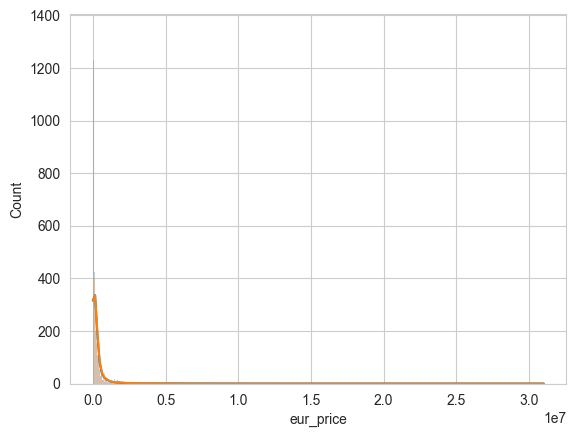

In [198]:
sns.histplot(x='eur_price',data=df,alpha=.3,kde=True)
sns.histplot(x='Price',data=df,alpha=.3,kde=True)


After converting, the distribution doesn't change a lot. 

## Manufacturer, Material, Type, Location

Based on EDA `Type` and `Location` have small number of missing values that don't change the distribution a lot so we can choose most frequent value as our imputation. `Manufacturer`,`Material` have large number of missing values so by choosing most frequent will change the distribution a lot, with large number of unique values and no information, the way we can do is assign them to `nothing` as new category.

In [199]:
# Imputing Type
df.Type=df.Type.fillna(df.Type.value_counts().index[0])

# Imputing Location
df.Location=df.Location.fillna(df.Location.value_counts().index[0])

# Imputing Manufacturer and Material
cat_null=['Manufacturer','Material']
df[cat_null]=df[cat_null].fillna('nothing')

In [200]:
# Checking total Null values of categorical variables after Imputation
df[cat_vars].isnull().sum()

Boat Type       0
Manufacturer    0
Type            0
Material        0
Location        0
Currency        0
dtype: int64

In [201]:
# Checking Null values of categorical variables in table after imputation
df[['Type','Manufacturer','Material','Location']]

,Type,Manufacturer,Material,Location
0,new boat from stock,Rigiflex power boats,nothing,Switzerland
1,new boat from stock,Terhi power boats,Thermoplastic,Germany
2,new boat from stock,Marine power boats,Aluminium,Switzerland
3,new boat from stock,Pioner power boats,nothing,Denmark
4,new boat from stock,Linder power boats,Aluminium,Germany
...,...,...,...,...
9883,"Used boat,Unleaded",Sea Ray power boats,nothing,Switzerland
9884,new boat from stock,nothing,GRP,Germany
9885,"new boat from stock,Unleaded",BlueCraft power boats,GRP,Germany
9886,new boat from stock,Whaly power boats,nothing,Italy


## Length and Width

`Length` and `Width` have missing values but based on EDA the correlation between `Length` and `Width` which means we should drop one of them, in this case we will drop `Width` because it has larger number of missing values than `Length`. Let's see if `Length` has relationship with one of categorical variables in order to do imputation.

In [202]:
num_vars.append('eur_price')

In [203]:
# Drop Width
df.drop('Width',axis=1,inplace=True)

<AxesSubplot:xlabel='Currency', ylabel='Length'>

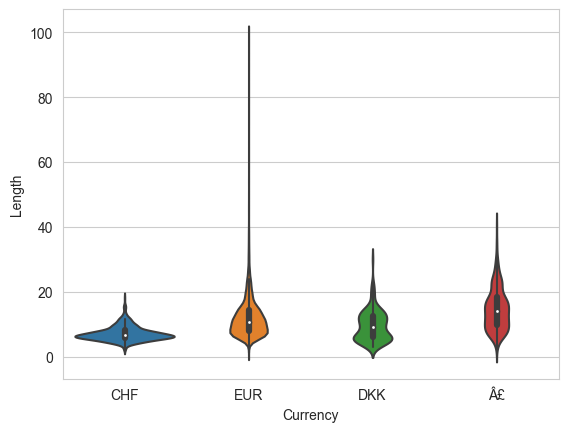

In [204]:
# Currency vs Length
sns.violinplot(x='Currency',y='Length',data=df)

Looks like we can choose `Currency` to group imputation.

In [205]:
# Group average of Length by Currency
df.groupby('Currency').Length.mean()

Currency
CHF     7.135378
DKK     9.487486
EUR    12.018516
Â£     14.696510
Name: Length, dtype: float64

We can use this way in doing imputation

In [206]:
# Imputing Length based on Currency
df.loc[(df.Currency == 'CHF')&(df.Length.isnull()),'Length']=7.13
df.loc[(df.Currency == 'DKK')&(df.Length.isnull()),'Length']=9.49
df.loc[(df.Currency == 'EUR')&(df.Length.isnull()),'Length']=12.01
df.loc[(df.Currency == 'Â£')&(df.Length.isnull()),'Length']=14.70

In [207]:
# Checking Length Null values
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Material                       0
Location                       0
Number of views last 7 days    0
Currency                       0
eur_price                      0
dtype: int64

## Year Built

In [208]:
# Drop rows with `0` value
df.drop(index=df[df['Year Built'] == 0 ].index,inplace=True)

In [209]:
## Number of views last 7 days

Based on Boxplot distribution, target variable values ​​more than 1500 start apart enough so we will drop rows with target values more than 1500.

In [210]:
# Drop rows with target values > 1500
df.drop(index=df[df[target] > 1500].index,inplace=True)

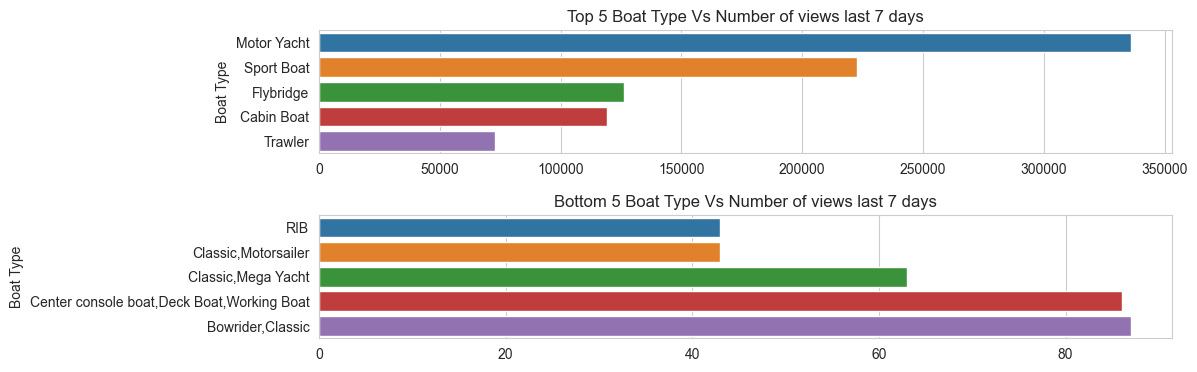

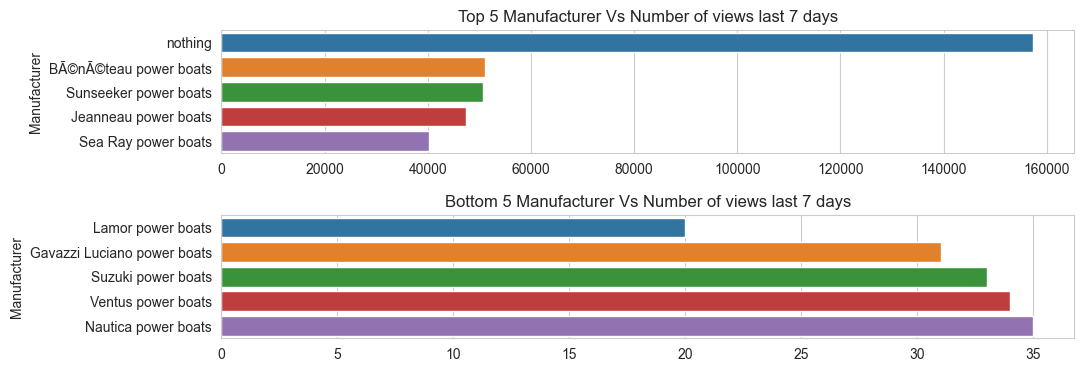

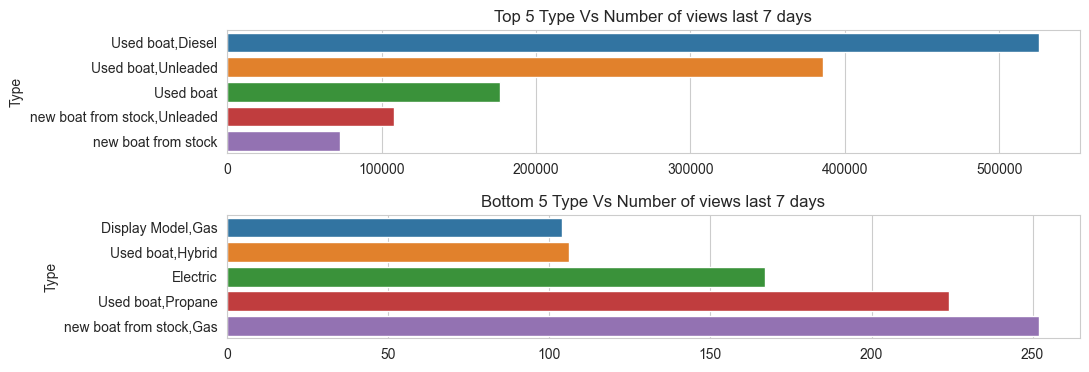

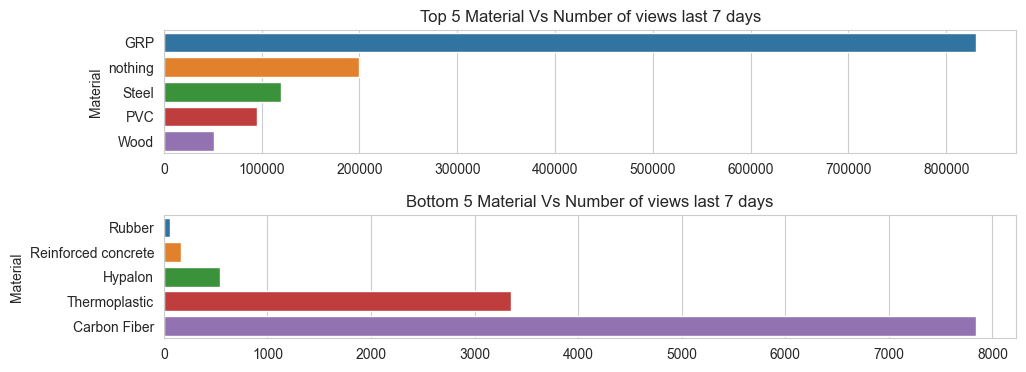

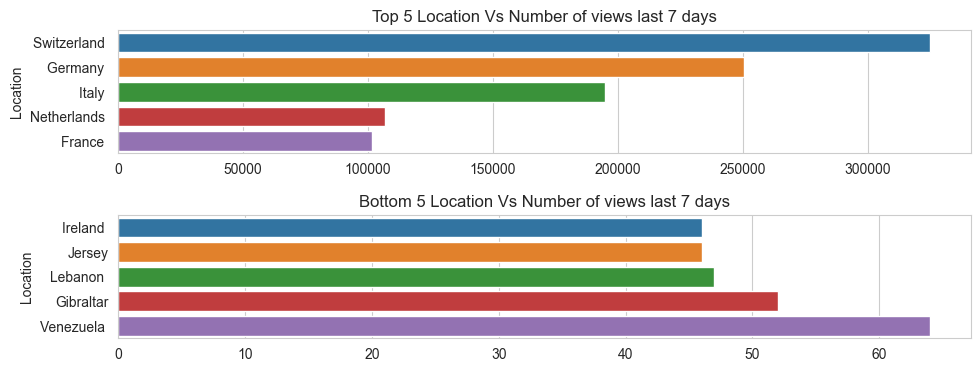

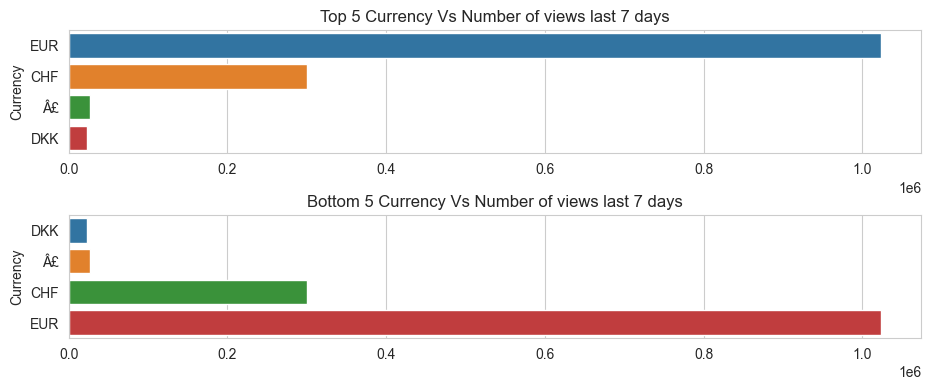

In [211]:
# Checking Categorical distribuion after imputing
for var in cat_vars:cat_vs_target(df,var)

# Model Development

Since this project is predicting number measurement or Regression Task we will these models and choose the best as our estimator by performing GridSearchCV on Pipeline with Processors and Models as parameters

## Instantiate Models and Processors

In [212]:
# Models
rf=RandomForestRegressor(n_jobs=-1)
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()
sv=SVR()

# Processors
le=LabelEncoder()
scaler=MinMaxScaler()

## Encode Categorical Variables

In [213]:
for col in cat_vars:
    df[f'{col}_en']=le.fit_transform(df[col])

In [214]:
# Checking dataset after Encoding
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Material,Location,Number of views last 7 days,Currency,eur_price,Boat Type_en,Manufacturer_en,Type_en,Material_en,Location_en,Currency_en
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017.0,4.00,nothing,Switzerland,226,CHF,3470.48,94,639,15,11,109,0
1,3490.0,Center console boat,Terhi power boats,new boat from stock,2020.0,4.00,Thermoplastic,Germany,75,EUR,3490.00,37,777,15,9,35,2
3,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020.0,3.00,nothing,Denmark,64,DKK,3367.00,114,593,15,11,23,1
4,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,Aluminium,Germany,58,EUR,3399.00,71,444,15,0,35,2
6,3600.0,Catamaran,nothing,"Used boat,Unleaded",1999.0,6.20,Aluminium,Switzerland,474,CHF,3744.00,36,884,14,0,109,0


## Split the Dataset

In [215]:
# Choosing dataset for model development
df_new=df[['Year Built','Length',target,'eur_price','Boat Type_en','Manufacturer_en','Type_en','Material_en','Location_en']]
df_new

,Year Built,Length,Number of views last 7 days,eur_price,Boat Type_en,Manufacturer_en,Type_en,Material_en,Location_en
0,2017.0,4.00,226,3470.48,94,639,15,11,109
1,2020.0,4.00,75,3490.00,37,777,15,9,35
3,2020.0,3.00,64,3367.00,114,593,15,11,23
4,2019.0,3.55,58,3399.00,71,444,15,0,35
6,1999.0,6.20,474,3744.00,36,884,14,0,109
...,...,...,...,...,...,...,...,...,...
9882,1984.0,6.00,288,5148.00,71,734,14,5,109
9883,1987.0,6.30,1116,5096.00,114,694,14,11,109
9885,2020.0,4.40,354,4499.00,114,130,20,2,35
9886,2018.0,4.37,266,4300.00,109,856,15,11,48


Those dataset we chosen for developing our model

In [216]:
# splitting data into predictor X and target y
X=df_new.drop(target,axis=1)
y=df_new[target]

# Splitting data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

## Instantiate Pipeline

In [217]:
# Assigning Models into parameters
param1={'regressor':[rf]}
param2={'regressor':[ada]}
param3={'regressor':[gb]}
param4={'regressor':[sv]}

params=[param1,param2,param3,param4]

# Intantiating Pipeline with processor and model
pipe=Pipeline(
    [('processor',scaler),('regressor',rf)]
)

## Instantiate GridSearchCV

In [218]:
# Instantiating GridSearchCV on pipeline with metrics R2 and mean_absolute_error
grid=GridSearchCV(pipe,params,n_jobs=-1,scoring=['r2','neg_mean_absolute_error'],refit='neg_mean_absolute_error')

## Perform GridSearchCV

In [219]:
# Fitting the models
grid.fit(X_train,y_train)

pd.DataFrame(grid.cv_results_)[['param_regressor','mean_test_r2','mean_test_neg_mean_absolute_error','rank_test_r2','rank_test_neg_mean_absolute_error']].sort_values('rank_test_r2')

,param_regressor,mean_test_r2,mean_test_neg_mean_absolute_error,rank_test_r2,rank_test_neg_mean_absolute_error
2,GradientBoostingRegressor(),0.403299,-62.170070,1,1
0,RandomForestRegressor(n_jobs=-1),0.389620,-62.519827,2,2
3,SVR(),0.012511,-74.377042,3,3
1,AdaBoostRegressor(),-0.991202,-153.752919,4,4


We see that `GradientBoostRegressor` is the best model considering `rank_test_r2` and `rank_test_neg_mean_absolute_error`

# Model Evaluation

Let's predict the test data and make some evaluation

In [220]:
# Predicting test data
y_pred=grid.predict(X_test)

print(f'MAE:{mean_absolute_error(y_test,y_pred)}')
print(f'R2:{r2_score(y_test,y_pred)}')

MAE:61.04247085370571
R2:0.4293965892410918


The MAE score explains that how many points the predictions deviate from the actual values, the lower the better. MAE score explains that the predictions deviate 61.05 points from actual values.

The R2 score explains that how much variance is explained by the model from the total variance the higher the better. R2 score explains that the model success to predict 42.9% from total variance


## Hyper Parameter Tunning

Now let's adjust the parameters from Gradient Boosting to achieve better performance

In [221]:
pipe=Pipeline(
    [('processor',scaler),('regressor',gb)]
    )

params={
    "regressor__learning_rate":[0.1],
    "regressor__n_estimators":[200],
    'regressor__loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'regressor__criterion':['friedman_mse', 'squared_error'],
    'regressor__max_features':['sqrt','log2',None]
}

grid=GridSearchCV(pipe,params,n_jobs=-1,scoring=['r2','neg_mean_absolute_error'],refit='r2')

grid.fit(X_train,y_train)

grid.best_score_

0.4188776284437893

We that the best parameters for Gradient Boosting give R2 score 41.64%. Now we want to use the best parameters and evaluate the model

In [222]:
y_pred=grid.predict(X_test)

print(f'R2:{r2_score(y_test,y_pred)}')
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')

R2:0.4434682192213576
MAE:60.313345805943484


R2 score 44.48% which is increase 2.84% better than default parameters.
MAE score 60.48 points lower than the score of default parameters 61.05 points which is good.

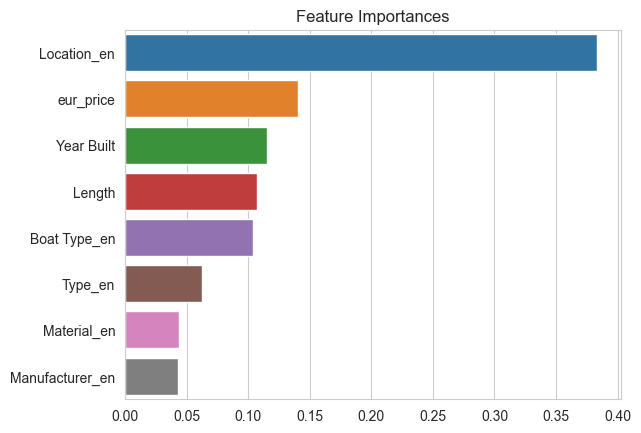

In [223]:
important_features=pd.DataFrame(grid.best_estimator_[1].feature_importances_,index=X_train.columns).sort_values(0,ascending=False)
sns.barplot(x=important_features[0],y=important_features.index)
plt.title('Feature Importances')
plt.xlabel('')
plt.show()

The graphic above shows us that Location is the most important in order to attract more viewers. The product manager should focus his business on the location of the used boat

# Comparison to Business Success Criteria

We know that the model should achieve 50% off and the best score we get from R2 score is 44.48% so the model failed to achieve business succes criteria. In order to improve the model,Nearly New Nautical should observe more number of variables and the categorical variables should be restricted in small number of given unique values to prevent high cardinality and invalid values. 

# Final Summary 

## Recomendation to The Business For Future works
Based on EDA and top feature importances, Nearly New Nautical should focus on the followings in order to grow the business:
1. Restrict the Location to Switzerland, Germany, Italy, Netherlands, France and prevent listing of Ireland, Jersey, Lebanon, Gibraltar, Venezuela
2. Restrict the Boat Type to Motor Yacht, Sport Boat, Flybridge, Cabin Boat, Trawler and prevent listing of  multiple type in Boat Type.


## Limitations and future improvements

Potential improvement could be made by grouping listings to the top markets and develop specific market for specific models. It would solve the outlier problem and also make predictions more accurate and less deviation and error.

The quality of location data is very poor, improvement should be made by limiting the data in a small number of categories, because location is the most important feature.
